# Collaboration and Competition

---

In this notebook the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program is beeing solved with two agents utilising the DDPG algorithm and a shared replay buffer.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# import environment
from unityagents import UnityEnvironment

# import general stuff
import os
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
# widget bar to display progress
!pip install progressbar
import progressbar as pb

# import specific / own stuff
import utils as ut
from ddpg_agent import Agent
from ddpg_agent import ReplayBuffer

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    lenEpisode = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        lenEpisode += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {:.2f}, Length of Episode is {} steps'.format(i, np.max(scores), lenEpisode))

Score (max over agents) from episode 1: 0.00, Length of Episode is 15 steps
Score (max over agents) from episode 2: 0.00, Length of Episode is 14 steps
Score (max over agents) from episode 3: 0.00, Length of Episode is 14 steps
Score (max over agents) from episode 4: 0.00, Length of Episode is 14 steps
Score (max over agents) from episode 5: 0.00, Length of Episode is 14 steps


 get some additional information about the variables

In [6]:
print('Last set of actions: {}'.format(actions))
print('Size of actions: {}'.format(actions.size))
print('Last rewards: {}'.format(rewards))
print('Last states: {}'.format(states))

Last set of actions: [[ 0.65871981  1.        ]
 [-0.90748659  0.55724271]]
Size of actions: 4
Last rewards: [0.0, -0.009999999776482582]
Last states: [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.14030886 -1.5
  -0.          0.         -7.11741829  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -7.9574213  -1.5
   0.          0.          7.11741829  6.          0.          0.        ]]


### 4. Let's start training!

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]

In [7]:
env_info = env.reset(train_mode=True)[brain_name]

#### define Multi-Agent DDPG

In [8]:
def ma_ddpg(n_episodes=100, max_t=100, beta_start=1.0, beta_end=0.01, beta_episodeEnd=80):
    """Deep Deterministic Policy Gradient for multi agent setup.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps
        beta_start (float): starting value of epsilon, for epsilon-greedy action selection
        beta_end (float): minimum value of epsilon
        beta_episodeEnd (float): number of episodes for which eps_end is reached
    """
    solved = False
    scores = []                                # list containing scores from each episode
    actions = [0 for i in range(num_agents)]   # list containing actions for all agents
    scores_window = deque(maxlen=100)          # last 100 scores
    steps_window = deque(maxlen=100)           # last 100 steps per episode
    beta = beta_start                          # initialize beta, that is factor for adding noise
    beta_decay_linear = (beta_start-beta_end)/beta_episodeEnd # compute linear beta decay rate
    best_averagescore = 0                      # keep track of best average score to save if desired
    
    for i_episode in range(1, n_episodes+1):        
        env_info = env.reset(train_mode=True)[brain_name]  # reset unity enviroment
        state = env_info.vector_observations               # get the current state 
        score = np.zeros(num_agents)                       # initialize the score (for each agent)
        steps = 0                                            
        for t in range(max_t):
            # choose action and perform it
            for i in range(num_agents):
                actions[i] = agents[i].act(state[i], beta)
            env_info = env.step(actions)[brain_name]       # send the actions to the environment
            
            # send env data to agent and initiate learning
            next_state = env_info.vector_observations      # get the next state
            reward = env_info.rewards                      # get the reward
            done = env_info.local_done                     # see if episode has finished
            
            for i in range(num_agents):
                agents[i].step(state[i], actions[i], reward[i], next_state[i], done[i])
            
            # do some tracking on the rewards
            state = next_state
            score += reward
            steps += 1
            if np.any(done):
                break 
        scores_window.append(np.max(score))       # save most recent score
        steps_window.append(steps)                # save number of steps
        scores.append(np.max(score))              # save most recent score
        beta = max(beta_end, beta_start - beta_decay_linear*i_episode) # decrease beta
        if 2*np.mean(steps_window) > max_t:
            max_t = 2*int(np.mean(steps_window)) # increase maximum number of steps
        
        # give some information about current progress 
        ut.print_info(i_episode, scores_window, steps_window)
        if i_episode % 100 == 0:
            # update progress widget bar
            timer.update(i_episode)
            ut.print_info(i_episode, scores_window, steps_window)
            if np.mean(scores_window) > best_averagescore:
                best_averagescore = np.mean(scores_window)
                ut.save_agentcheckpoint(state_size, action_size, agents) # save agent networks
        if np.mean(scores_window)>=0.5 and is not solved:
            # yeaaah, we did it!
            solved = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            # break   # uncomment to keep on going
    # finish timer
    timer.finish()    

    return scores

#### create the agents and replay buffer

In [9]:
# parameters for ReplayBuffer
BUFFER_SIZE = int(5e5) # replay buffer size
BATCH_SIZE = 512       # minibatch size for learning
print('Ratio Buffer/Batch: {:.2f}'.format(BUFFER_SIZE/BATCH_SIZE))
print('Estimate of episodes until learning is initiated: {:.2f}'.format(BATCH_SIZE/30))

# create one common replay memory
memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, 321)

# create and load agents (optional)
agents = ut.create_agents(state_size, action_size, num_agents, memory)
# agents = ut.load_agents(state_size, action_size, num_agents, memory)

Ratio Buffer/Batch: 976.562500
Estimate of episodes until learning is initiated: 17.066667


#### start the training

In [10]:
# parameters for learning
max_t=2000          # only as start value, will be increased inside the ma_ddpg algorithm
beta_start=1.0
beta_end=0.01
n_episodes=4000
beta_episodeEnd=n_episodes

# create progress bar to keep track 
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=n_episodes).start()

# do actual learning
scores = ma_ddpg(n_episodes, max_t, beta_start, beta_end, beta_episodeEnd)

# save learned agents if desired (best agent is saved within training loop)
# ut.save_agentcheckpoint(state_size, action_size, agents)

Episode 99	 Score Min/Mean/Max: 0.00 / 0.01 / 0.10 	 Steps Min/Mean/Max: 14 / 15.2 / 32

Episode 199	 Score Min/Mean/Max: 0.00 / 0.01 / 0.10 	 Steps Min/Mean/Max: 13 / 16.1 / 50

Episode 299	 Score Min/Mean/Max: 0.00 / 0.00 / 0.10 	 Steps Min/Mean/Max: 14 / 14.5 / 31

Episode 399	 Score Min/Mean/Max: 0.00 / 0.00 / 0.09 	 Steps Min/Mean/Max: 14 / 14.4 / 32

Episode 499	 Score Min/Mean/Max: 0.00 / 0.00 / 0.09 	 Steps Min/Mean/Max: 14 / 14.4 / 29

Episode 599	 Score Min/Mean/Max: 0.00 / 0.00 / 0.00 	 Steps Min/Mean/Max: 13 / 14.2 / 15

Episode 699	 Score Min/Mean/Max: 0.00 / 0.00 / 0.00 	 Steps Min/Mean/Max: 14 / 14.5 / 31

Episode 799	 Score Min/Mean/Max: 0.00 / 0.00 / 0.10 	 Steps Min/Mean/Max: 14 / 14.8 / 32

Episode 899	 Score Min/Mean/Max: 0.00 / 0.01 / 0.10 	 Steps Min/Mean/Max: 13 / 16.7 / 37

Episode 999	 Score Min/Mean/Max: 0.00 / 0.03 / 0.10 	 Steps Min/Mean/Max: 13 / 18.7 / 36

Episode 1099	 Score Min/Mean/Max: 0.00 / 0.02 / 0.10 	 Steps Min/Mean/Max: 13 / 17.6 / 40

Episode 1199	 Score Min/Mean/Max: 0.00 / 0.03 / 0.20 	 Steps Min/Mean/Max: 13 / 20.3 / 72

Episode 1299	 Score Min/Mean/Max: 0.00 / 0.04 / 0.20 	 Steps Min/Mean/Max: 14 / 23.2 / 71

Episode 1399	 Score Min/Mean/Max: 0.00 / 0.06 / 0.20 	 Steps Min/Mean/Max: 13 / 25.6 / 80

Episode 1499	 Score Min/Mean/Max: 0.00 / 0.10 / 0.30 	 Steps Min/Mean/Max: 13 / 39.8 / 131

Episode 1599	 Score Min/Mean/Max: 0.00 / 0.12 / 0.40 	 Steps Min/Mean/Max: 13 / 48.2 / 164

Episode 1699	 Score Min/Mean/Max: 0.00 / 0.19 / 0.80 	 Steps Min/Mean/Max: 13 / 74.1 / 318

Episode 1799	 Score Min/Mean/Max: 0.00 / 0.24 / 1.10 	 Steps Min/Mean/Max: 13 / 98.6 / 436

Episode 1870	 Score Min/Mean/Max: 0.00 / 0.50 / 2.60 	 Steps Min/Mean/Max: 13 / 201.9 / 1001
Environment solved in 1870 episodes!	Average Score: 0.50
Episode 1871	 Score Min/Mean/Max: 0.00 / 0.51 / 2.60 	 Steps Min/Mean/Max: 13 / 204.6 / 1001
Environment solved in 1871 episodes!	Average Score: 0.51
Episode 1872	 Score Min/Mean/Max: 0.00 / 0.51 / 2.60 	 Steps Min/Mean/Max: 13 / 204.4 / 1001
Environment solved in 1872 episodes!	Average Score: 0.51
Episode 1873	 Score Min/Mean/Max: 0.00 / 0.51 / 2.60 	 Steps Min/Mean/Max: 13 / 206.5 / 1001
Environment solved in 1873 episodes!	Average Score: 0.51
Episode 1874	 Score Min/Mean/Max: 0.00 / 0.52 / 2.60 	 Steps Min/Mean/Max: 13 / 206.7 / 1001
Environment solved in 1874 episodes!	Average Score: 0.52
Episode 1875	 Score Min/Mean/Max: 0.00 / 0.51 / 2.60 	 Steps Min/Mean/Max: 13 / 205.8 / 1001
Environment solved in 1875 episodes!	Average Score: 0.51
Episode 1876	 Score Min/Mean/Max: 0.00 / 0.52 / 2.60 	 Steps Min/Mean/Max: 13 / 208.6 / 1001
Environ

Episode 1900	 Score Min/Mean/Max: 0.00 / 0.55 / 2.60 	 Steps Min/Mean/Max: 13 / 217.5 / 1001
Environment solved in 1900 episodes!	Average Score: 0.55
Episode 1901	 Score Min/Mean/Max: 0.00 / 0.55 / 2.60 	 Steps Min/Mean/Max: 13 / 216.6 / 1001
Environment solved in 1901 episodes!	Average Score: 0.55
Episode 1902	 Score Min/Mean/Max: 0.00 / 0.54 / 2.60 	 Steps Min/Mean/Max: 13 / 214.6 / 1001
Environment solved in 1902 episodes!	Average Score: 0.54
Episode 1903	 Score Min/Mean/Max: 0.00 / 0.55 / 2.60 	 Steps Min/Mean/Max: 13 / 216.6 / 1001
Environment solved in 1903 episodes!	Average Score: 0.55
Episode 1904	 Score Min/Mean/Max: 0.00 / 0.54 / 2.60 	 Steps Min/Mean/Max: 13 / 214.9 / 1001
Environment solved in 1904 episodes!	Average Score: 0.54
Episode 1905	 Score Min/Mean/Max: 0.00 / 0.55 / 2.60 	 Steps Min/Mean/Max: 13 / 215.9 / 1001
Environment solved in 1905 episodes!	Average Score: 0.55
Episode 1906	 Score Min/Mean/Max: 0.00 / 0.54 / 2.60 	 Steps Min/Mean/Max: 13 / 215.7 / 1001
Environ

Episode 2058	 Score Min/Mean/Max: 0.00 / 0.50 / 2.50 	 Steps Min/Mean/Max: 14 / 198.0 / 1001
Environment solved in 2058 episodes!	Average Score: 0.50
Episode 2059	 Score Min/Mean/Max: 0.00 / 0.50 / 2.50 	 Steps Min/Mean/Max: 14 / 198.1 / 1001
Environment solved in 2059 episodes!	Average Score: 0.50
Episode 2060	 Score Min/Mean/Max: 0.00 / 0.52 / 2.50 	 Steps Min/Mean/Max: 14 / 202.3 / 1001
Environment solved in 2060 episodes!	Average Score: 0.52
Episode 2061	 Score Min/Mean/Max: 0.00 / 0.51 / 2.50 	 Steps Min/Mean/Max: 14 / 200.4 / 1001
Environment solved in 2061 episodes!	Average Score: 0.51
Episode 2062	 Score Min/Mean/Max: 0.00 / 0.51 / 2.50 	 Steps Min/Mean/Max: 14 / 200.8 / 1001
Environment solved in 2062 episodes!	Average Score: 0.51
Episode 2063	 Score Min/Mean/Max: 0.00 / 0.51 / 2.50 	 Steps Min/Mean/Max: 14 / 201.0 / 1001
Environment solved in 2063 episodes!	Average Score: 0.51
Episode 2064	 Score Min/Mean/Max: 0.00 / 0.51 / 2.50 	 Steps Min/Mean/Max: 14 / 201.0 / 1001
Environ

Episode 2145	 Score Min/Mean/Max: 0.00 / 0.51 / 2.60 	 Steps Min/Mean/Max: 13 / 202.3 / 1001
Environment solved in 2145 episodes!	Average Score: 0.51
Episode 2146	 Score Min/Mean/Max: 0.00 / 0.53 / 2.60 	 Steps Min/Mean/Max: 13 / 208.9 / 1001
Environment solved in 2146 episodes!	Average Score: 0.53
Episode 2147	 Score Min/Mean/Max: 0.00 / 0.53 / 2.60 	 Steps Min/Mean/Max: 13 / 208.8 / 1001
Environment solved in 2147 episodes!	Average Score: 0.53
Episode 2148	 Score Min/Mean/Max: 0.00 / 0.53 / 2.60 	 Steps Min/Mean/Max: 13 / 208.0 / 1001
Environment solved in 2148 episodes!	Average Score: 0.53
Episode 2149	 Score Min/Mean/Max: 0.00 / 0.53 / 2.60 	 Steps Min/Mean/Max: 13 / 208.3 / 1001
Environment solved in 2149 episodes!	Average Score: 0.53
Episode 2150	 Score Min/Mean/Max: 0.00 / 0.53 / 2.60 	 Steps Min/Mean/Max: 13 / 210.1 / 1001
Environment solved in 2150 episodes!	Average Score: 0.53
Episode 2151	 Score Min/Mean/Max: 0.00 / 0.54 / 2.60 	 Steps Min/Mean/Max: 13 / 212.6 / 1001
Environ

Episode 2195	 Score Min/Mean/Max: 0.00 / 0.59 / 2.60 	 Steps Min/Mean/Max: 14 / 229.8 / 1001
Environment solved in 2195 episodes!	Average Score: 0.59
Episode 2196	 Score Min/Mean/Max: 0.00 / 0.58 / 2.60 	 Steps Min/Mean/Max: 14 / 227.2 / 1001
Environment solved in 2196 episodes!	Average Score: 0.58
Episode 2197	 Score Min/Mean/Max: 0.00 / 0.59 / 2.60 	 Steps Min/Mean/Max: 14 / 229.6 / 1001
Environment solved in 2197 episodes!	Average Score: 0.59
Episode 2198	 Score Min/Mean/Max: 0.00 / 0.61 / 2.60 	 Steps Min/Mean/Max: 14 / 238.5 / 1001
Environment solved in 2198 episodes!	Average Score: 0.61
Episode 2199	 Score Min/Mean/Max: 0.00 / 0.61 / 2.60 	 Steps Min/Mean/Max: 14 / 239.6 / 1001
Environment solved in 2199 episodes!	Average Score: 0.61


Episode 2200	 Score Min/Mean/Max: 0.00 / 0.63 / 2.60 	 Steps Min/Mean/Max: 14 / 243.7 / 1001
Environment solved in 2200 episodes!	Average Score: 0.63
Episode 2201	 Score Min/Mean/Max: 0.00 / 0.63 / 2.60 	 Steps Min/Mean/Max: 14 / 245.8 / 1001
Environment solved in 2201 episodes!	Average Score: 0.63
Episode 2202	 Score Min/Mean/Max: 0.00 / 0.63 / 2.60 	 Steps Min/Mean/Max: 14 / 245.8 / 1001
Environment solved in 2202 episodes!	Average Score: 0.63
Episode 2203	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 14 / 252.8 / 1001
Environment solved in 2203 episodes!	Average Score: 0.65
Episode 2204	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 14 / 254.3 / 1001
Environment solved in 2204 episodes!	Average Score: 0.65
Episode 2205	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 14 / 254.1 / 1001
Environment solved in 2205 episodes!	Average Score: 0.65
Episode 2206	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 15 / 254.4 / 1001
Environ

Episode 2250	 Score Min/Mean/Max: 0.00 / 0.73 / 2.60 	 Steps Min/Mean/Max: 13 / 285.6 / 1001
Environment solved in 2250 episodes!	Average Score: 0.73
Episode 2251	 Score Min/Mean/Max: 0.00 / 0.73 / 2.60 	 Steps Min/Mean/Max: 13 / 284.2 / 1001
Environment solved in 2251 episodes!	Average Score: 0.73
Episode 2252	 Score Min/Mean/Max: 0.00 / 0.73 / 2.60 	 Steps Min/Mean/Max: 13 / 284.6 / 1001
Environment solved in 2252 episodes!	Average Score: 0.73
Episode 2253	 Score Min/Mean/Max: 0.00 / 0.73 / 2.60 	 Steps Min/Mean/Max: 13 / 284.5 / 1001
Environment solved in 2253 episodes!	Average Score: 0.73
Episode 2254	 Score Min/Mean/Max: 0.00 / 0.73 / 2.60 	 Steps Min/Mean/Max: 13 / 285.1 / 1001
Environment solved in 2254 episodes!	Average Score: 0.73
Episode 2255	 Score Min/Mean/Max: 0.00 / 0.74 / 2.60 	 Steps Min/Mean/Max: 13 / 290.6 / 1001
Environment solved in 2255 episodes!	Average Score: 0.74
Episode 2256	 Score Min/Mean/Max: 0.00 / 0.75 / 2.60 	 Steps Min/Mean/Max: 13 / 293.6 / 1001
Environ

Episode 2300	 Score Min/Mean/Max: 0.00 / 0.87 / 2.60 	 Steps Min/Mean/Max: 13 / 339.4 / 1001
Environment solved in 2300 episodes!	Average Score: 0.87
Episode 2301	 Score Min/Mean/Max: 0.00 / 0.87 / 2.60 	 Steps Min/Mean/Max: 13 / 337.1 / 1001
Environment solved in 2301 episodes!	Average Score: 0.87
Episode 2302	 Score Min/Mean/Max: 0.00 / 0.87 / 2.60 	 Steps Min/Mean/Max: 13 / 338.9 / 1001
Environment solved in 2302 episodes!	Average Score: 0.87
Episode 2303	 Score Min/Mean/Max: 0.00 / 0.86 / 2.60 	 Steps Min/Mean/Max: 13 / 333.3 / 1001
Environment solved in 2303 episodes!	Average Score: 0.86
Episode 2304	 Score Min/Mean/Max: 0.00 / 0.87 / 2.60 	 Steps Min/Mean/Max: 13 / 338.4 / 1001
Environment solved in 2304 episodes!	Average Score: 0.87
Episode 2305	 Score Min/Mean/Max: 0.00 / 0.87 / 2.60 	 Steps Min/Mean/Max: 13 / 336.7 / 1001
Environment solved in 2305 episodes!	Average Score: 0.87
Episode 2306	 Score Min/Mean/Max: 0.00 / 0.89 / 2.60 	 Steps Min/Mean/Max: 13 / 345.3 / 1001
Environ

Episode 2350	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 13 / 375.9 / 1001
Environment solved in 2350 episodes!	Average Score: 0.97
Episode 2351	 Score Min/Mean/Max: 0.00 / 0.98 / 2.70 	 Steps Min/Mean/Max: 13 / 378.0 / 1001
Environment solved in 2351 episodes!	Average Score: 0.98
Episode 2352	 Score Min/Mean/Max: 0.00 / 0.98 / 2.70 	 Steps Min/Mean/Max: 13 / 378.9 / 1001
Environment solved in 2352 episodes!	Average Score: 0.98
Episode 2353	 Score Min/Mean/Max: 0.00 / 0.98 / 2.70 	 Steps Min/Mean/Max: 13 / 378.8 / 1001
Environment solved in 2353 episodes!	Average Score: 0.98
Episode 2354	 Score Min/Mean/Max: 0.00 / 0.99 / 2.70 	 Steps Min/Mean/Max: 13 / 380.9 / 1001
Environment solved in 2354 episodes!	Average Score: 0.99
Episode 2355	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 13 / 374.7 / 1001
Environment solved in 2355 episodes!	Average Score: 0.97
Episode 2356	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 13 / 373.2 / 1001
Environ

Episode 2400	 Score Min/Mean/Max: 0.00 / 1.02 / 2.70 	 Steps Min/Mean/Max: 4 / 397.3 / 1001
Environment solved in 2400 episodes!	Average Score: 1.02
Episode 2401	 Score Min/Mean/Max: 0.00 / 1.02 / 2.70 	 Steps Min/Mean/Max: 4 / 396.7 / 1001
Environment solved in 2401 episodes!	Average Score: 1.02
Episode 2402	 Score Min/Mean/Max: 0.00 / 1.02 / 2.70 	 Steps Min/Mean/Max: 4 / 396.9 / 1001
Environment solved in 2402 episodes!	Average Score: 1.02
Episode 2403	 Score Min/Mean/Max: 0.00 / 1.03 / 2.70 	 Steps Min/Mean/Max: 4 / 398.3 / 1001
Environment solved in 2403 episodes!	Average Score: 1.03
Episode 2404	 Score Min/Mean/Max: 0.00 / 1.01 / 2.70 	 Steps Min/Mean/Max: 4 / 391.9 / 1001
Environment solved in 2404 episodes!	Average Score: 1.01
Episode 2405	 Score Min/Mean/Max: 0.00 / 1.02 / 2.70 	 Steps Min/Mean/Max: 4 / 394.1 / 1001
Environment solved in 2405 episodes!	Average Score: 1.02
Episode 2406	 Score Min/Mean/Max: 0.00 / 1.01 / 2.70 	 Steps Min/Mean/Max: 4 / 390.6 / 1001
Environment so

Episode 2450	 Score Min/Mean/Max: 0.00 / 0.87 / 2.60 	 Steps Min/Mean/Max: 4 / 338.7 / 1001
Environment solved in 2450 episodes!	Average Score: 0.87
Episode 2451	 Score Min/Mean/Max: 0.00 / 0.86 / 2.60 	 Steps Min/Mean/Max: 4 / 336.1 / 1001
Environment solved in 2451 episodes!	Average Score: 0.86
Episode 2452	 Score Min/Mean/Max: 0.00 / 0.86 / 2.60 	 Steps Min/Mean/Max: 4 / 334.4 / 1001
Environment solved in 2452 episodes!	Average Score: 0.86
Episode 2453	 Score Min/Mean/Max: 0.00 / 0.86 / 2.60 	 Steps Min/Mean/Max: 4 / 336.2 / 1001
Environment solved in 2453 episodes!	Average Score: 0.86
Episode 2454	 Score Min/Mean/Max: 0.00 / 0.88 / 2.60 	 Steps Min/Mean/Max: 4 / 341.4 / 1001
Environment solved in 2454 episodes!	Average Score: 0.88
Episode 2455	 Score Min/Mean/Max: 0.00 / 0.89 / 2.60 	 Steps Min/Mean/Max: 4 / 345.3 / 1001
Environment solved in 2455 episodes!	Average Score: 0.89
Episode 2456	 Score Min/Mean/Max: 0.00 / 0.91 / 2.60 	 Steps Min/Mean/Max: 4 / 352.1 / 1001
Environment so

Episode 2500	 Score Min/Mean/Max: 0.00 / 0.94 / 2.70 	 Steps Min/Mean/Max: 13 / 364.2 / 1001
Environment solved in 2500 episodes!	Average Score: 0.94
Episode 2501	 Score Min/Mean/Max: 0.00 / 0.96 / 2.70 	 Steps Min/Mean/Max: 13 / 372.4 / 1001
Environment solved in 2501 episodes!	Average Score: 0.96
Episode 2502	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 13 / 376.2 / 1001
Environment solved in 2502 episodes!	Average Score: 0.97
Episode 2503	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 13 / 375.0 / 1001
Environment solved in 2503 episodes!	Average Score: 0.97
Episode 2504	 Score Min/Mean/Max: 0.00 / 0.99 / 2.70 	 Steps Min/Mean/Max: 13 / 381.1 / 1001
Environment solved in 2504 episodes!	Average Score: 0.99
Episode 2505	 Score Min/Mean/Max: 0.00 / 0.99 / 2.70 	 Steps Min/Mean/Max: 13 / 383.9 / 1001
Environment solved in 2505 episodes!	Average Score: 0.99
Episode 2506	 Score Min/Mean/Max: 0.00 / 0.98 / 2.70 	 Steps Min/Mean/Max: 13 / 379.7 / 1001
Environ

Episode 2550	 Score Min/Mean/Max: 0.00 / 1.30 / 2.70 	 Steps Min/Mean/Max: 3 / 499.0 / 1001
Environment solved in 2550 episodes!	Average Score: 1.30
Episode 2551	 Score Min/Mean/Max: 0.00 / 1.30 / 2.70 	 Steps Min/Mean/Max: 3 / 502.4 / 1001
Environment solved in 2551 episodes!	Average Score: 1.30
Episode 2552	 Score Min/Mean/Max: 0.00 / 1.33 / 2.70 	 Steps Min/Mean/Max: 3 / 511.8 / 1001
Environment solved in 2552 episodes!	Average Score: 1.33
Episode 2553	 Score Min/Mean/Max: 0.00 / 1.34 / 2.70 	 Steps Min/Mean/Max: 3 / 517.9 / 1001
Environment solved in 2553 episodes!	Average Score: 1.34
Episode 2554	 Score Min/Mean/Max: 0.00 / 1.35 / 2.70 	 Steps Min/Mean/Max: 3 / 518.4 / 1001
Environment solved in 2554 episodes!	Average Score: 1.35
Episode 2555	 Score Min/Mean/Max: 0.00 / 1.34 / 2.70 	 Steps Min/Mean/Max: 3 / 517.4 / 1001
Environment solved in 2555 episodes!	Average Score: 1.34
Episode 2556	 Score Min/Mean/Max: 0.00 / 1.32 / 2.70 	 Steps Min/Mean/Max: 3 / 509.4 / 1001
Environment so

Episode 2600	 Score Min/Mean/Max: 0.00 / 1.29 / 2.70 	 Steps Min/Mean/Max: 3 / 496.4 / 1001
Environment solved in 2600 episodes!	Average Score: 1.29
Episode 2601	 Score Min/Mean/Max: 0.00 / 1.26 / 2.70 	 Steps Min/Mean/Max: 3 / 486.6 / 1001
Environment solved in 2601 episodes!	Average Score: 1.26
Episode 2602	 Score Min/Mean/Max: 0.00 / 1.24 / 2.70 	 Steps Min/Mean/Max: 3 / 479.0 / 1001
Environment solved in 2602 episodes!	Average Score: 1.24
Episode 2603	 Score Min/Mean/Max: 0.00 / 1.26 / 2.70 	 Steps Min/Mean/Max: 3 / 486.8 / 1001
Environment solved in 2603 episodes!	Average Score: 1.26
Episode 2604	 Score Min/Mean/Max: 0.00 / 1.27 / 2.70 	 Steps Min/Mean/Max: 3 / 489.6 / 1001
Environment solved in 2604 episodes!	Average Score: 1.27
Episode 2605	 Score Min/Mean/Max: 0.00 / 1.25 / 2.70 	 Steps Min/Mean/Max: 3 / 484.0 / 1001
Environment solved in 2605 episodes!	Average Score: 1.25
Episode 2606	 Score Min/Mean/Max: 0.00 / 1.25 / 2.70 	 Steps Min/Mean/Max: 3 / 483.4 / 1001
Environment so

Episode 2650	 Score Min/Mean/Max: 0.00 / 1.22 / 2.70 	 Steps Min/Mean/Max: 14 / 467.1 / 1001
Environment solved in 2650 episodes!	Average Score: 1.22
Episode 2651	 Score Min/Mean/Max: 0.00 / 1.21 / 2.70 	 Steps Min/Mean/Max: 14 / 465.7 / 1001
Environment solved in 2651 episodes!	Average Score: 1.21
Episode 2652	 Score Min/Mean/Max: 0.00 / 1.21 / 2.70 	 Steps Min/Mean/Max: 14 / 465.7 / 1001
Environment solved in 2652 episodes!	Average Score: 1.21
Episode 2653	 Score Min/Mean/Max: 0.00 / 1.19 / 2.70 	 Steps Min/Mean/Max: 14 / 456.9 / 1001
Environment solved in 2653 episodes!	Average Score: 1.19
Episode 2654	 Score Min/Mean/Max: 0.00 / 1.18 / 2.70 	 Steps Min/Mean/Max: 14 / 455.1 / 1001
Environment solved in 2654 episodes!	Average Score: 1.18
Episode 2655	 Score Min/Mean/Max: 0.00 / 1.17 / 2.70 	 Steps Min/Mean/Max: 14 / 448.7 / 1001
Environment solved in 2655 episodes!	Average Score: 1.17
Episode 2656	 Score Min/Mean/Max: 0.00 / 1.17 / 2.70 	 Steps Min/Mean/Max: 14 / 448.5 / 1001
Environ

Episode 2700	 Score Min/Mean/Max: 0.09 / 1.15 / 2.70 	 Steps Min/Mean/Max: 18 / 439.1 / 1001
Environment solved in 2700 episodes!	Average Score: 1.15
Episode 2701	 Score Min/Mean/Max: 0.09 / 1.15 / 2.70 	 Steps Min/Mean/Max: 18 / 439.1 / 1001
Environment solved in 2701 episodes!	Average Score: 1.15
Episode 2702	 Score Min/Mean/Max: 0.09 / 1.17 / 2.70 	 Steps Min/Mean/Max: 18 / 448.8 / 1001
Environment solved in 2702 episodes!	Average Score: 1.17
Episode 2703	 Score Min/Mean/Max: 0.09 / 1.15 / 2.70 	 Steps Min/Mean/Max: 18 / 439.7 / 1001
Environment solved in 2703 episodes!	Average Score: 1.15
Episode 2704	 Score Min/Mean/Max: 0.09 / 1.14 / 2.70 	 Steps Min/Mean/Max: 18 / 437.1 / 1001
Environment solved in 2704 episodes!	Average Score: 1.14
Episode 2705	 Score Min/Mean/Max: 0.09 / 1.14 / 2.70 	 Steps Min/Mean/Max: 18 / 437.6 / 1001
Environment solved in 2705 episodes!	Average Score: 1.14
Episode 2706	 Score Min/Mean/Max: 0.09 / 1.17 / 2.70 	 Steps Min/Mean/Max: 18 / 446.9 / 1001
Environ

Episode 2750	 Score Min/Mean/Max: 0.00 / 1.03 / 2.70 	 Steps Min/Mean/Max: 10 / 398.2 / 1001
Environment solved in 2750 episodes!	Average Score: 1.03
Episode 2751	 Score Min/Mean/Max: 0.00 / 1.02 / 2.70 	 Steps Min/Mean/Max: 10 / 396.1 / 1001
Environment solved in 2751 episodes!	Average Score: 1.02
Episode 2752	 Score Min/Mean/Max: 0.00 / 1.00 / 2.70 	 Steps Min/Mean/Max: 10 / 388.7 / 1001
Environment solved in 2752 episodes!	Average Score: 1.00
Episode 2753	 Score Min/Mean/Max: 0.00 / 1.01 / 2.70 	 Steps Min/Mean/Max: 10 / 391.4 / 1001
Environment solved in 2753 episodes!	Average Score: 1.01
Episode 2754	 Score Min/Mean/Max: 0.00 / 0.99 / 2.70 	 Steps Min/Mean/Max: 10 / 385.5 / 1001
Environment solved in 2754 episodes!	Average Score: 0.99
Episode 2755	 Score Min/Mean/Max: 0.00 / 1.00 / 2.70 	 Steps Min/Mean/Max: 10 / 388.3 / 1001
Environment solved in 2755 episodes!	Average Score: 1.00
Episode 2756	 Score Min/Mean/Max: 0.00 / 1.01 / 2.70 	 Steps Min/Mean/Max: 10 / 391.1 / 1001
Environ

Episode 2800	 Score Min/Mean/Max: 0.00 / 1.03 / 2.70 	 Steps Min/Mean/Max: 8 / 401.2 / 1001
Environment solved in 2800 episodes!	Average Score: 1.03
Episode 2801	 Score Min/Mean/Max: 0.00 / 1.06 / 2.70 	 Steps Min/Mean/Max: 8 / 410.9 / 1001
Environment solved in 2801 episodes!	Average Score: 1.06
Episode 2802	 Score Min/Mean/Max: 0.00 / 1.04 / 2.70 	 Steps Min/Mean/Max: 8 / 403.4 / 1001
Environment solved in 2802 episodes!	Average Score: 1.04
Episode 2803	 Score Min/Mean/Max: 0.00 / 1.04 / 2.70 	 Steps Min/Mean/Max: 8 / 405.2 / 1001
Environment solved in 2803 episodes!	Average Score: 1.04
Episode 2804	 Score Min/Mean/Max: 0.00 / 1.05 / 2.70 	 Steps Min/Mean/Max: 8 / 407.7 / 1001
Environment solved in 2804 episodes!	Average Score: 1.05
Episode 2805	 Score Min/Mean/Max: 0.00 / 1.08 / 2.70 	 Steps Min/Mean/Max: 8 / 417.1 / 1001
Environment solved in 2805 episodes!	Average Score: 1.08
Episode 2806	 Score Min/Mean/Max: 0.00 / 1.06 / 2.70 	 Steps Min/Mean/Max: 8 / 409.6 / 1001
Environment so

Episode 2850	 Score Min/Mean/Max: 0.00 / 1.15 / 2.70 	 Steps Min/Mean/Max: 8 / 442.7 / 1001
Environment solved in 2850 episodes!	Average Score: 1.15
Episode 2851	 Score Min/Mean/Max: 0.00 / 1.15 / 2.70 	 Steps Min/Mean/Max: 8 / 442.6 / 1001
Environment solved in 2851 episodes!	Average Score: 1.15
Episode 2852	 Score Min/Mean/Max: 0.00 / 1.15 / 2.70 	 Steps Min/Mean/Max: 8 / 440.2 / 1001
Environment solved in 2852 episodes!	Average Score: 1.15
Episode 2853	 Score Min/Mean/Max: 0.00 / 1.16 / 2.70 	 Steps Min/Mean/Max: 8 / 446.3 / 1001
Environment solved in 2853 episodes!	Average Score: 1.16
Episode 2854	 Score Min/Mean/Max: 0.00 / 1.18 / 2.70 	 Steps Min/Mean/Max: 8 / 454.9 / 1001
Environment solved in 2854 episodes!	Average Score: 1.18
Episode 2855	 Score Min/Mean/Max: 0.00 / 1.20 / 2.70 	 Steps Min/Mean/Max: 8 / 460.8 / 1001
Environment solved in 2855 episodes!	Average Score: 1.20
Episode 2856	 Score Min/Mean/Max: 0.00 / 1.19 / 2.70 	 Steps Min/Mean/Max: 8 / 457.5 / 1001
Environment so

Episode 2900	 Score Min/Mean/Max: 0.00 / 1.53 / 2.70 	 Steps Min/Mean/Max: 3 / 584.0 / 1001
Environment solved in 2900 episodes!	Average Score: 1.53
Episode 2901	 Score Min/Mean/Max: 0.00 / 1.53 / 2.70 	 Steps Min/Mean/Max: 3 / 584.0 / 1001
Environment solved in 2901 episodes!	Average Score: 1.53
Episode 2902	 Score Min/Mean/Max: 0.00 / 1.55 / 2.70 	 Steps Min/Mean/Max: 3 / 591.6 / 1001
Environment solved in 2902 episodes!	Average Score: 1.55
Episode 2903	 Score Min/Mean/Max: 0.00 / 1.54 / 2.70 	 Steps Min/Mean/Max: 3 / 588.9 / 1001
Environment solved in 2903 episodes!	Average Score: 1.54
Episode 2904	 Score Min/Mean/Max: 0.00 / 1.53 / 2.70 	 Steps Min/Mean/Max: 3 / 584.5 / 1001
Environment solved in 2904 episodes!	Average Score: 1.53
Episode 2905	 Score Min/Mean/Max: 0.00 / 1.51 / 2.70 	 Steps Min/Mean/Max: 3 / 574.9 / 1001
Environment solved in 2905 episodes!	Average Score: 1.51
Episode 2906	 Score Min/Mean/Max: 0.00 / 1.53 / 2.70 	 Steps Min/Mean/Max: 3 / 582.3 / 1001
Environment so

Episode 2950	 Score Min/Mean/Max: 0.00 / 1.74 / 2.70 	 Steps Min/Mean/Max: 3 / 663.3 / 1001
Environment solved in 2950 episodes!	Average Score: 1.74
Episode 2951	 Score Min/Mean/Max: 0.00 / 1.77 / 2.70 	 Steps Min/Mean/Max: 3 / 672.3 / 1001
Environment solved in 2951 episodes!	Average Score: 1.77
Episode 2952	 Score Min/Mean/Max: 0.00 / 1.78 / 2.70 	 Steps Min/Mean/Max: 3 / 677.4 / 1001
Environment solved in 2952 episodes!	Average Score: 1.78
Episode 2953	 Score Min/Mean/Max: 0.00 / 1.76 / 2.70 	 Steps Min/Mean/Max: 3 / 671.0 / 1001
Environment solved in 2953 episodes!	Average Score: 1.76
Episode 2954	 Score Min/Mean/Max: 0.00 / 1.76 / 2.70 	 Steps Min/Mean/Max: 3 / 671.0 / 1001
Environment solved in 2954 episodes!	Average Score: 1.76
Episode 2955	 Score Min/Mean/Max: 0.00 / 1.76 / 2.70 	 Steps Min/Mean/Max: 3 / 669.9 / 1001
Environment solved in 2955 episodes!	Average Score: 1.76
Episode 2956	 Score Min/Mean/Max: 0.00 / 1.77 / 2.70 	 Steps Min/Mean/Max: 3 / 673.7 / 1001
Environment so

Episode 3000	 Score Min/Mean/Max: 0.00 / 1.59 / 2.70 	 Steps Min/Mean/Max: 4 / 604.8 / 1001
Environment solved in 3000 episodes!	Average Score: 1.59
Episode 3001	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 4 / 595.0 / 1001
Environment solved in 3001 episodes!	Average Score: 1.56
Episode 3002	 Score Min/Mean/Max: 0.00 / 1.54 / 2.70 	 Steps Min/Mean/Max: 4 / 586.1 / 1001
Environment solved in 3002 episodes!	Average Score: 1.54
Episode 3003	 Score Min/Mean/Max: 0.00 / 1.54 / 2.70 	 Steps Min/Mean/Max: 14 / 588.3 / 1001
Environment solved in 3003 episodes!	Average Score: 1.54
Episode 3004	 Score Min/Mean/Max: 0.00 / 1.54 / 2.70 	 Steps Min/Mean/Max: 14 / 589.6 / 1001
Environment solved in 3004 episodes!	Average Score: 1.54
Episode 3005	 Score Min/Mean/Max: 0.00 / 1.54 / 2.70 	 Steps Min/Mean/Max: 14 / 589.5 / 1001
Environment solved in 3005 episodes!	Average Score: 1.54
Episode 3006	 Score Min/Mean/Max: 0.00 / 1.52 / 2.70 	 Steps Min/Mean/Max: 14 / 580.8 / 1001
Environmen

Episode 3050	 Score Min/Mean/Max: 0.00 / 0.90 / 2.70 	 Steps Min/Mean/Max: 14 / 345.5 / 1001
Environment solved in 3050 episodes!	Average Score: 0.90
Episode 3051	 Score Min/Mean/Max: 0.00 / 0.87 / 2.70 	 Steps Min/Mean/Max: 14 / 336.9 / 1001
Environment solved in 3051 episodes!	Average Score: 0.87
Episode 3052	 Score Min/Mean/Max: 0.00 / 0.87 / 2.70 	 Steps Min/Mean/Max: 14 / 334.0 / 1001
Environment solved in 3052 episodes!	Average Score: 0.87
Episode 3053	 Score Min/Mean/Max: 0.00 / 0.86 / 2.70 	 Steps Min/Mean/Max: 14 / 332.2 / 1001
Environment solved in 3053 episodes!	Average Score: 0.86
Episode 3054	 Score Min/Mean/Max: 0.00 / 0.85 / 2.70 	 Steps Min/Mean/Max: 14 / 326.4 / 1001
Environment solved in 3054 episodes!	Average Score: 0.85
Episode 3055	 Score Min/Mean/Max: 0.00 / 0.84 / 2.70 	 Steps Min/Mean/Max: 14 / 322.9 / 1001
Environment solved in 3055 episodes!	Average Score: 0.84
Episode 3056	 Score Min/Mean/Max: 0.00 / 0.83 / 2.70 	 Steps Min/Mean/Max: 14 / 319.7 / 1001
Environ

Episode 3100	 Score Min/Mean/Max: 0.00 / 0.50 / 2.20 	 Steps Min/Mean/Max: 14 / 198.4 / 855
Environment solved in 3100 episodes!	Average Score: 0.50
Episode 3101	 Score Min/Mean/Max: 0.00 / 0.52 / 2.20 	 Steps Min/Mean/Max: 14 / 204.9 / 855
Environment solved in 3101 episodes!	Average Score: 0.52
Episode 3102	 Score Min/Mean/Max: 0.00 / 0.52 / 2.20 	 Steps Min/Mean/Max: 14 / 206.0 / 855
Environment solved in 3102 episodes!	Average Score: 0.52
Episode 3103	 Score Min/Mean/Max: 0.00 / 0.52 / 2.20 	 Steps Min/Mean/Max: 14 / 204.7 / 855
Environment solved in 3103 episodes!	Average Score: 0.52
Episode 3104	 Score Min/Mean/Max: 0.00 / 0.50 / 2.20 	 Steps Min/Mean/Max: 14 / 199.9 / 855
Environment solved in 3104 episodes!	Average Score: 0.50
Episode 3105	 Score Min/Mean/Max: 0.00 / 0.51 / 2.20 	 Steps Min/Mean/Max: 14 / 200.3 / 855
Environment solved in 3105 episodes!	Average Score: 0.51
Episode 3106	 Score Min/Mean/Max: 0.00 / 0.51 / 2.20 	 Steps Min/Mean/Max: 14 / 201.1 / 855
Environment so

Episode 3150	 Score Min/Mean/Max: 0.00 / 0.84 / 2.70 	 Steps Min/Mean/Max: 14 / 327.9 / 1001
Environment solved in 3150 episodes!	Average Score: 0.84
Episode 3151	 Score Min/Mean/Max: 0.00 / 0.86 / 2.70 	 Steps Min/Mean/Max: 14 / 336.5 / 1001
Environment solved in 3151 episodes!	Average Score: 0.86
Episode 3152	 Score Min/Mean/Max: 0.00 / 0.89 / 2.70 	 Steps Min/Mean/Max: 14 / 344.1 / 1001
Environment solved in 3152 episodes!	Average Score: 0.89
Episode 3153	 Score Min/Mean/Max: 0.00 / 0.88 / 2.70 	 Steps Min/Mean/Max: 14 / 343.1 / 1001
Environment solved in 3153 episodes!	Average Score: 0.88
Episode 3154	 Score Min/Mean/Max: 0.00 / 0.90 / 2.70 	 Steps Min/Mean/Max: 14 / 348.9 / 1001
Environment solved in 3154 episodes!	Average Score: 0.90
Episode 3155	 Score Min/Mean/Max: 0.00 / 0.89 / 2.70 	 Steps Min/Mean/Max: 14 / 345.0 / 1001
Environment solved in 3155 episodes!	Average Score: 0.89
Episode 3156	 Score Min/Mean/Max: 0.00 / 0.91 / 2.70 	 Steps Min/Mean/Max: 14 / 354.4 / 1001
Environ

Episode 3200	 Score Min/Mean/Max: 0.00 / 1.26 / 2.70 	 Steps Min/Mean/Max: 8 / 483.5 / 1001
Environment solved in 3200 episodes!	Average Score: 1.26
Episode 3201	 Score Min/Mean/Max: 0.00 / 1.25 / 2.70 	 Steps Min/Mean/Max: 8 / 481.2 / 1001
Environment solved in 3201 episodes!	Average Score: 1.25
Episode 3202	 Score Min/Mean/Max: 0.00 / 1.25 / 2.70 	 Steps Min/Mean/Max: 8 / 481.3 / 1001
Environment solved in 3202 episodes!	Average Score: 1.25
Episode 3203	 Score Min/Mean/Max: 0.00 / 1.28 / 2.70 	 Steps Min/Mean/Max: 8 / 490.4 / 1001
Environment solved in 3203 episodes!	Average Score: 1.28
Episode 3204	 Score Min/Mean/Max: 0.00 / 1.29 / 2.70 	 Steps Min/Mean/Max: 8 / 494.5 / 1001
Environment solved in 3204 episodes!	Average Score: 1.29
Episode 3205	 Score Min/Mean/Max: 0.00 / 1.31 / 2.70 	 Steps Min/Mean/Max: 8 / 503.9 / 1001
Environment solved in 3205 episodes!	Average Score: 1.31
Episode 3206	 Score Min/Mean/Max: 0.00 / 1.34 / 2.70 	 Steps Min/Mean/Max: 8 / 511.9 / 1001
Environment so

Episode 3250	 Score Min/Mean/Max: 0.00 / 1.80 / 2.70 	 Steps Min/Mean/Max: 4 / 682.7 / 1001
Environment solved in 3250 episodes!	Average Score: 1.80
Episode 3251	 Score Min/Mean/Max: 0.00 / 1.77 / 2.70 	 Steps Min/Mean/Max: 4 / 673.3 / 1001
Environment solved in 3251 episodes!	Average Score: 1.77
Episode 3252	 Score Min/Mean/Max: 0.00 / 1.77 / 2.70 	 Steps Min/Mean/Max: 4 / 673.3 / 1001
Environment solved in 3252 episodes!	Average Score: 1.77
Episode 3253	 Score Min/Mean/Max: 0.00 / 1.80 / 2.70 	 Steps Min/Mean/Max: 4 / 682.4 / 1001
Environment solved in 3253 episodes!	Average Score: 1.80
Episode 3254	 Score Min/Mean/Max: 0.00 / 1.80 / 2.70 	 Steps Min/Mean/Max: 4 / 682.4 / 1001
Environment solved in 3254 episodes!	Average Score: 1.80
Episode 3255	 Score Min/Mean/Max: 0.00 / 1.82 / 2.70 	 Steps Min/Mean/Max: 4 / 691.9 / 1001
Environment solved in 3255 episodes!	Average Score: 1.82
Episode 3256	 Score Min/Mean/Max: 0.00 / 1.82 / 2.70 	 Steps Min/Mean/Max: 4 / 691.9 / 1001
Environment so

Episode 3300	 Score Min/Mean/Max: 0.00 / 2.01 / 2.70 	 Steps Min/Mean/Max: 4 / 760.7 / 1001
Environment solved in 3300 episodes!	Average Score: 2.01
Episode 3301	 Score Min/Mean/Max: 0.00 / 2.02 / 2.70 	 Steps Min/Mean/Max: 4 / 766.0 / 1001
Environment solved in 3301 episodes!	Average Score: 2.02
Episode 3302	 Score Min/Mean/Max: 0.00 / 2.04 / 2.70 	 Steps Min/Mean/Max: 4 / 773.7 / 1001
Environment solved in 3302 episodes!	Average Score: 2.04
Episode 3303	 Score Min/Mean/Max: 0.00 / 2.05 / 2.70 	 Steps Min/Mean/Max: 4 / 773.7 / 1001
Environment solved in 3303 episodes!	Average Score: 2.05
Episode 3304	 Score Min/Mean/Max: 0.00 / 2.05 / 2.70 	 Steps Min/Mean/Max: 4 / 777.0 / 1001
Environment solved in 3304 episodes!	Average Score: 2.05
Episode 3305	 Score Min/Mean/Max: 0.00 / 2.05 / 2.70 	 Steps Min/Mean/Max: 4 / 774.9 / 1001
Environment solved in 3305 episodes!	Average Score: 2.05
Episode 3306	 Score Min/Mean/Max: 0.00 / 2.03 / 2.70 	 Steps Min/Mean/Max: 4 / 766.7 / 1001
Environment so

Episode 3350	 Score Min/Mean/Max: 0.00 / 1.83 / 2.70 	 Steps Min/Mean/Max: 4 / 693.5 / 1001
Environment solved in 3350 episodes!	Average Score: 1.83
Episode 3351	 Score Min/Mean/Max: 0.00 / 1.84 / 2.70 	 Steps Min/Mean/Max: 4 / 696.6 / 1001
Environment solved in 3351 episodes!	Average Score: 1.84
Episode 3352	 Score Min/Mean/Max: 0.00 / 1.81 / 2.70 	 Steps Min/Mean/Max: 4 / 686.7 / 1001
Environment solved in 3352 episodes!	Average Score: 1.81
Episode 3353	 Score Min/Mean/Max: 0.00 / 1.78 / 2.70 	 Steps Min/Mean/Max: 4 / 677.0 / 1001
Environment solved in 3353 episodes!	Average Score: 1.78
Episode 3354	 Score Min/Mean/Max: 0.00 / 1.76 / 2.70 	 Steps Min/Mean/Max: 4 / 667.7 / 1001
Environment solved in 3354 episodes!	Average Score: 1.76
Episode 3355	 Score Min/Mean/Max: 0.00 / 1.73 / 2.70 	 Steps Min/Mean/Max: 4 / 658.3 / 1001
Environment solved in 3355 episodes!	Average Score: 1.73
Episode 3356	 Score Min/Mean/Max: 0.00 / 1.71 / 2.70 	 Steps Min/Mean/Max: 4 / 648.6 / 1001
Environment so

Episode 3400	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 15 / 592.9 / 1001
Environment solved in 3400 episodes!	Average Score: 1.56
Episode 3401	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 15 / 593.2 / 1001
Environment solved in 3401 episodes!	Average Score: 1.56
Episode 3402	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 15 / 593.2 / 1001
Environment solved in 3402 episodes!	Average Score: 1.56
Episode 3403	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 15 / 593.2 / 1001
Environment solved in 3403 episodes!	Average Score: 1.56
Episode 3404	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 15 / 593.7 / 1001
Environment solved in 3404 episodes!	Average Score: 1.56
Episode 3405	 Score Min/Mean/Max: 0.00 / 1.54 / 2.70 	 Steps Min/Mean/Max: 15 / 588.4 / 1001
Environment solved in 3405 episodes!	Average Score: 1.54
Episode 3406	 Score Min/Mean/Max: 0.00 / 1.55 / 2.70 	 Steps Min/Mean/Max: 15 / 592.1 / 1001
Environ

Episode 3450	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 13 / 595.3 / 1001
Environment solved in 3450 episodes!	Average Score: 1.56
Episode 3451	 Score Min/Mean/Max: 0.00 / 1.55 / 2.70 	 Steps Min/Mean/Max: 13 / 592.0 / 1001
Environment solved in 3451 episodes!	Average Score: 1.55
Episode 3452	 Score Min/Mean/Max: 0.00 / 1.58 / 2.70 	 Steps Min/Mean/Max: 13 / 601.9 / 1001
Environment solved in 3452 episodes!	Average Score: 1.58
Episode 3453	 Score Min/Mean/Max: 0.00 / 1.58 / 2.70 	 Steps Min/Mean/Max: 13 / 601.8 / 1001
Environment solved in 3453 episodes!	Average Score: 1.58
Episode 3454	 Score Min/Mean/Max: 0.00 / 1.58 / 2.70 	 Steps Min/Mean/Max: 13 / 603.4 / 1001
Environment solved in 3454 episodes!	Average Score: 1.58
Episode 3455	 Score Min/Mean/Max: 0.00 / 1.61 / 2.70 	 Steps Min/Mean/Max: 13 / 612.8 / 1001
Environment solved in 3455 episodes!	Average Score: 1.61
Episode 3456	 Score Min/Mean/Max: 0.00 / 1.61 / 2.70 	 Steps Min/Mean/Max: 13 / 613.0 / 1001
Environ

Episode 3500	 Score Min/Mean/Max: 0.00 / 1.34 / 2.70 	 Steps Min/Mean/Max: 4 / 510.5 / 1001
Environment solved in 3500 episodes!	Average Score: 1.34
Episode 3501	 Score Min/Mean/Max: 0.00 / 1.33 / 2.70 	 Steps Min/Mean/Max: 4 / 506.4 / 1001
Environment solved in 3501 episodes!	Average Score: 1.33
Episode 3502	 Score Min/Mean/Max: 0.00 / 1.30 / 2.70 	 Steps Min/Mean/Max: 4 / 496.5 / 1001
Environment solved in 3502 episodes!	Average Score: 1.30
Episode 3503	 Score Min/Mean/Max: 0.00 / 1.30 / 2.70 	 Steps Min/Mean/Max: 4 / 496.5 / 1001
Environment solved in 3503 episodes!	Average Score: 1.30
Episode 3504	 Score Min/Mean/Max: 0.00 / 1.28 / 2.70 	 Steps Min/Mean/Max: 4 / 491.3 / 1001
Environment solved in 3504 episodes!	Average Score: 1.28
Episode 3505	 Score Min/Mean/Max: 0.00 / 1.28 / 2.70 	 Steps Min/Mean/Max: 4 / 489.1 / 1001
Environment solved in 3505 episodes!	Average Score: 1.28
Episode 3506	 Score Min/Mean/Max: 0.00 / 1.26 / 2.70 	 Steps Min/Mean/Max: 4 / 484.1 / 1001
Environment so

Episode 3550	 Score Min/Mean/Max: 0.00 / 0.78 / 2.70 	 Steps Min/Mean/Max: 4 / 304.1 / 1001
Environment solved in 3550 episodes!	Average Score: 0.78
Episode 3551	 Score Min/Mean/Max: 0.00 / 0.78 / 2.70 	 Steps Min/Mean/Max: 4 / 305.0 / 1001
Environment solved in 3551 episodes!	Average Score: 0.78
Episode 3552	 Score Min/Mean/Max: 0.00 / 0.76 / 2.70 	 Steps Min/Mean/Max: 4 / 296.4 / 1001
Environment solved in 3552 episodes!	Average Score: 0.76
Episode 3553	 Score Min/Mean/Max: 0.00 / 0.77 / 2.70 	 Steps Min/Mean/Max: 4 / 300.8 / 1001
Environment solved in 3553 episodes!	Average Score: 0.77
Episode 3554	 Score Min/Mean/Max: 0.00 / 0.77 / 2.70 	 Steps Min/Mean/Max: 4 / 298.9 / 1001
Environment solved in 3554 episodes!	Average Score: 0.77
Episode 3555	 Score Min/Mean/Max: 0.00 / 0.74 / 2.70 	 Steps Min/Mean/Max: 4 / 289.6 / 1001
Environment solved in 3555 episodes!	Average Score: 0.74
Episode 3556	 Score Min/Mean/Max: 0.00 / 0.75 / 2.70 	 Steps Min/Mean/Max: 4 / 291.7 / 1001
Environment so

Episode 3600	 Score Min/Mean/Max: 0.00 / 0.66 / 2.60 	 Steps Min/Mean/Max: 5 / 261.7 / 1001
Environment solved in 3600 episodes!	Average Score: 0.66
Episode 3601	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 5 / 257.2 / 1001
Environment solved in 3601 episodes!	Average Score: 0.65
Episode 3602	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 5 / 257.9 / 1001
Environment solved in 3602 episodes!	Average Score: 0.65
Episode 3603	 Score Min/Mean/Max: 0.00 / 0.65 / 2.60 	 Steps Min/Mean/Max: 5 / 257.9 / 1001
Environment solved in 3603 episodes!	Average Score: 0.65
Episode 3604	 Score Min/Mean/Max: 0.00 / 0.64 / 2.60 	 Steps Min/Mean/Max: 5 / 253.3 / 1001
Environment solved in 3604 episodes!	Average Score: 0.64
Episode 3605	 Score Min/Mean/Max: 0.00 / 0.67 / 2.60 	 Steps Min/Mean/Max: 5 / 262.4 / 1001
Environment solved in 3605 episodes!	Average Score: 0.67
Episode 3606	 Score Min/Mean/Max: 0.00 / 0.67 / 2.60 	 Steps Min/Mean/Max: 5 / 262.9 / 1001
Environment so

Episode 3650	 Score Min/Mean/Max: 0.00 / 0.71 / 2.60 	 Steps Min/Mean/Max: 5 / 277.9 / 1001
Environment solved in 3650 episodes!	Average Score: 0.71
Episode 3651	 Score Min/Mean/Max: 0.00 / 0.72 / 2.60 	 Steps Min/Mean/Max: 5 / 281.1 / 1001
Environment solved in 3651 episodes!	Average Score: 0.72
Episode 3652	 Score Min/Mean/Max: 0.00 / 0.73 / 2.60 	 Steps Min/Mean/Max: 5 / 283.6 / 1001
Environment solved in 3652 episodes!	Average Score: 0.73
Episode 3653	 Score Min/Mean/Max: 0.00 / 0.72 / 2.60 	 Steps Min/Mean/Max: 5 / 279.8 / 1001
Environment solved in 3653 episodes!	Average Score: 0.72
Episode 3654	 Score Min/Mean/Max: 0.00 / 0.72 / 2.60 	 Steps Min/Mean/Max: 5 / 280.0 / 1001
Environment solved in 3654 episodes!	Average Score: 0.72
Episode 3655	 Score Min/Mean/Max: 0.00 / 0.72 / 2.60 	 Steps Min/Mean/Max: 5 / 280.0 / 1001
Environment solved in 3655 episodes!	Average Score: 0.72
Episode 3656	 Score Min/Mean/Max: 0.00 / 0.71 / 2.60 	 Steps Min/Mean/Max: 5 / 277.7 / 1001
Environment so

Episode 3700	 Score Min/Mean/Max: 0.00 / 0.76 / 2.70 	 Steps Min/Mean/Max: 20 / 294.8 / 1001
Environment solved in 3700 episodes!	Average Score: 0.76
Episode 3701	 Score Min/Mean/Max: 0.00 / 0.76 / 2.70 	 Steps Min/Mean/Max: 20 / 294.0 / 1001
Environment solved in 3701 episodes!	Average Score: 0.76
Episode 3702	 Score Min/Mean/Max: 0.00 / 0.76 / 2.70 	 Steps Min/Mean/Max: 20 / 294.4 / 1001
Environment solved in 3702 episodes!	Average Score: 0.76
Episode 3703	 Score Min/Mean/Max: 0.00 / 0.74 / 2.70 	 Steps Min/Mean/Max: 20 / 285.1 / 1001
Environment solved in 3703 episodes!	Average Score: 0.74
Episode 3704	 Score Min/Mean/Max: 0.00 / 0.74 / 2.70 	 Steps Min/Mean/Max: 20 / 287.2 / 1001
Environment solved in 3704 episodes!	Average Score: 0.74
Episode 3705	 Score Min/Mean/Max: 0.00 / 0.73 / 2.70 	 Steps Min/Mean/Max: 20 / 283.0 / 1001
Environment solved in 3705 episodes!	Average Score: 0.73
Episode 3706	 Score Min/Mean/Max: 0.00 / 0.73 / 2.70 	 Steps Min/Mean/Max: 20 / 282.4 / 1001
Environ

Episode 3750	 Score Min/Mean/Max: 0.00 / 0.96 / 2.70 	 Steps Min/Mean/Max: 17 / 371.0 / 1001
Environment solved in 3750 episodes!	Average Score: 0.96
Episode 3751	 Score Min/Mean/Max: 0.00 / 0.98 / 2.70 	 Steps Min/Mean/Max: 17 / 376.6 / 1001
Environment solved in 3751 episodes!	Average Score: 0.98
Episode 3752	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 16 / 372.8 / 1001
Environment solved in 3752 episodes!	Average Score: 0.97
Episode 3753	 Score Min/Mean/Max: 0.00 / 0.97 / 2.70 	 Steps Min/Mean/Max: 15 / 372.3 / 1001
Environment solved in 3753 episodes!	Average Score: 0.97
Episode 3754	 Score Min/Mean/Max: 0.00 / 0.99 / 2.70 	 Steps Min/Mean/Max: 15 / 379.4 / 1001
Environment solved in 3754 episodes!	Average Score: 0.99
Episode 3755	 Score Min/Mean/Max: 0.00 / 1.01 / 2.70 	 Steps Min/Mean/Max: 15 / 388.7 / 1001
Environment solved in 3755 episodes!	Average Score: 1.01
Episode 3756	 Score Min/Mean/Max: 0.00 / 1.03 / 2.70 	 Steps Min/Mean/Max: 15 / 395.5 / 1001
Environ

Episode 3800	 Score Min/Mean/Max: 0.00 / 1.03 / 2.70 	 Steps Min/Mean/Max: 14 / 395.7 / 1001
Environment solved in 3800 episodes!	Average Score: 1.03
Episode 3801	 Score Min/Mean/Max: 0.00 / 1.05 / 2.70 	 Steps Min/Mean/Max: 14 / 405.0 / 1001
Environment solved in 3801 episodes!	Average Score: 1.05
Episode 3802	 Score Min/Mean/Max: 0.00 / 1.05 / 2.70 	 Steps Min/Mean/Max: 14 / 404.7 / 1001
Environment solved in 3802 episodes!	Average Score: 1.05
Episode 3803	 Score Min/Mean/Max: 0.00 / 1.06 / 2.70 	 Steps Min/Mean/Max: 14 / 407.0 / 1001
Environment solved in 3803 episodes!	Average Score: 1.06
Episode 3804	 Score Min/Mean/Max: 0.00 / 1.05 / 2.70 	 Steps Min/Mean/Max: 14 / 405.9 / 1001
Environment solved in 3804 episodes!	Average Score: 1.05
Episode 3805	 Score Min/Mean/Max: 0.00 / 1.05 / 2.70 	 Steps Min/Mean/Max: 14 / 405.7 / 1001
Environment solved in 3805 episodes!	Average Score: 1.05
Episode 3806	 Score Min/Mean/Max: 0.00 / 1.07 / 2.70 	 Steps Min/Mean/Max: 14 / 410.6 / 1001
Environ

Episode 3850	 Score Min/Mean/Max: 0.00 / 1.08 / 2.70 	 Steps Min/Mean/Max: 14 / 414.6 / 1001
Environment solved in 3850 episodes!	Average Score: 1.08
Episode 3851	 Score Min/Mean/Max: 0.00 / 1.08 / 2.70 	 Steps Min/Mean/Max: 14 / 414.6 / 1001
Environment solved in 3851 episodes!	Average Score: 1.08
Episode 3852	 Score Min/Mean/Max: 0.00 / 1.10 / 2.70 	 Steps Min/Mean/Max: 14 / 424.4 / 1001
Environment solved in 3852 episodes!	Average Score: 1.10
Episode 3853	 Score Min/Mean/Max: 0.00 / 1.13 / 2.70 	 Steps Min/Mean/Max: 14 / 434.3 / 1001
Environment solved in 3853 episodes!	Average Score: 1.13
Episode 3854	 Score Min/Mean/Max: 0.00 / 1.13 / 2.70 	 Steps Min/Mean/Max: 14 / 436.4 / 1001
Environment solved in 3854 episodes!	Average Score: 1.13
Episode 3855	 Score Min/Mean/Max: 0.00 / 1.11 / 2.70 	 Steps Min/Mean/Max: 14 / 428.8 / 1001
Environment solved in 3855 episodes!	Average Score: 1.11
Episode 3856	 Score Min/Mean/Max: 0.00 / 1.10 / 2.70 	 Steps Min/Mean/Max: 14 / 424.0 / 1001
Environ

Episode 3900	 Score Min/Mean/Max: 0.00 / 1.38 / 2.70 	 Steps Min/Mean/Max: 2 / 529.9 / 1001
Environment solved in 3900 episodes!	Average Score: 1.38
Episode 3901	 Score Min/Mean/Max: 0.00 / 1.36 / 2.70 	 Steps Min/Mean/Max: 2 / 521.4 / 1001
Environment solved in 3901 episodes!	Average Score: 1.36
Episode 3902	 Score Min/Mean/Max: 0.00 / 1.38 / 2.70 	 Steps Min/Mean/Max: 2 / 530.5 / 1001
Environment solved in 3902 episodes!	Average Score: 1.38
Episode 3903	 Score Min/Mean/Max: 0.00 / 1.40 / 2.70 	 Steps Min/Mean/Max: 2 / 537.5 / 1001
Environment solved in 3903 episodes!	Average Score: 1.40
Episode 3904	 Score Min/Mean/Max: 0.00 / 1.40 / 2.70 	 Steps Min/Mean/Max: 2 / 536.5 / 1001
Environment solved in 3904 episodes!	Average Score: 1.40
Episode 3905	 Score Min/Mean/Max: 0.00 / 1.40 / 2.70 	 Steps Min/Mean/Max: 2 / 534.8 / 1001
Environment solved in 3905 episodes!	Average Score: 1.40
Episode 3906	 Score Min/Mean/Max: 0.00 / 1.38 / 2.70 	 Steps Min/Mean/Max: 2 / 529.8 / 1001
Environment so

Episode 3950	 Score Min/Mean/Max: 0.00 / 1.57 / 2.70 	 Steps Min/Mean/Max: 2 / 598.8 / 1001
Environment solved in 3950 episodes!	Average Score: 1.57
Episode 3951	 Score Min/Mean/Max: 0.00 / 1.57 / 2.70 	 Steps Min/Mean/Max: 2 / 598.8 / 1001
Environment solved in 3951 episodes!	Average Score: 1.57
Episode 3952	 Score Min/Mean/Max: 0.00 / 1.57 / 2.70 	 Steps Min/Mean/Max: 2 / 598.8 / 1001
Environment solved in 3952 episodes!	Average Score: 1.57
Episode 3953	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 2 / 596.3 / 1001
Environment solved in 3953 episodes!	Average Score: 1.56
Episode 3954	 Score Min/Mean/Max: 0.00 / 1.55 / 2.70 	 Steps Min/Mean/Max: 2 / 590.0 / 1001
Environment solved in 3954 episodes!	Average Score: 1.55
Episode 3955	 Score Min/Mean/Max: 0.00 / 1.57 / 2.70 	 Steps Min/Mean/Max: 2 / 597.6 / 1001
Environment solved in 3955 episodes!	Average Score: 1.57
Episode 3956	 Score Min/Mean/Max: 0.00 / 1.56 / 2.70 	 Steps Min/Mean/Max: 2 / 596.8 / 1001
Environment so

Episode 4000	 Score Min/Mean/Max: 0.00 / 1.40 / 2.70 	 Steps Min/Mean/Max: 4 / 538.5 / 1001
Environment solved in 4000 episodes!	Average Score: 1.40


In [11]:
#save data
filename = ut.get_numberedfilename('./data/scores_MADDPG_episodes{}'.format(n_episodes, beta_episodeEnd), 'pkl')
with open(filename, 'wb') as f:
    pickle.dump(scores, f)

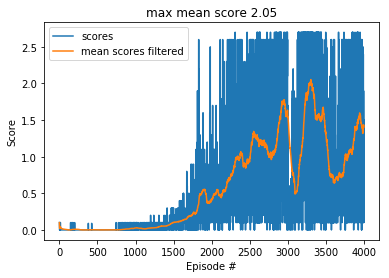

In [12]:
# find save name that doesn't already exist
filename = ut.get_numberedfilename('./data/plot_MADDPG_episodes{}'.format(n_episodes, beta_episodeEnd), 'png')

# plot and save data
scores_filtered = ut.moving_average(scores)
plt.plot(scores, label='scores')
plt.plot(scores_filtered, label='mean scores filtered')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('max mean score {:.2f}'.format(np.max(scores_filtered)))
plt.savefig(filename)
plt.show()


evaluate performance over 100 episodes without exploration

In [13]:
# load best agents found and saved
agents = ut.load_agents(state_size, action_size, num_agents, memory)

scores = []                                # list containing scores from each episode
scores_window = deque(maxlen=100)          # last 100 scores
steps_window = deque(maxlen=100)           # last 100 steps per episode
    
for i_episode in range(1, 101):                                    # play game for 100 episodes
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    lenEpisode = 0
    score = np.zeros(num_agents)                       # initialize the score (for each agent)
    steps = 0   
    actions = [0 for i in range(num_agents)]               # list containing actions for all agents    
    while True:
        for i in range(num_agents):
            actions[i] = agents[i].act(states[i], beta=0.0)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        reward = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        states = next_states                               # roll over states to next time step
        # do some tracking on the rewards
        score += reward
        steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_window.append(np.max(score))       # save most recent score
    steps_window.append(steps)                # save number of steps
    scores.append(np.max(score))              # save most recent score
    ut.print_info(i_episode, scores_window, steps_window)    

Episode 100	 Score Min/Mean/Max: 0.00 / 2.56 / 2.70 	 Steps Min/Mean/Max: 4 / 962.2 / 1001001

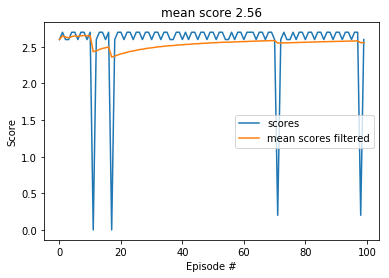

In [14]:
# find save name that doesn't already exist
filename = ut.get_numberedfilename('./data/evalplot_MADDPG_episodes{}'.format(n_episodes, beta_episodeEnd), 'png')

# plot and save data
scores_filtered = ut.moving_average(scores)
plt.plot(scores, label='scores')
plt.plot(scores_filtered, label='mean scores filtered')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('mean score {:.2f}'.format(scores_filtered[-1]))
plt.savefig(filename)
plt.show()

save agents if desired as trained agents (careful, this will overwrite the data sets used in the next section)

In [ ]:
#ut.save_agenttrained(state_size, action_size, agents) # save agent networks

### 5. watch trained agent

#### Load trained agent if needed

Note: you have to run sections 1 to 3 of the code above for initialisation of parameters. Training in section 4 can be skipped, and saved agents are loaded instead.

In [15]:
if 'agents' in locals():
    print('using new trained agents')
else:
    print('no agents available, loading from file')
    memory = ReplayBuffer(action_size, int(5e5), 512, 321)    # as no training in this section, just a dummy
    agents = ut.load_trainedagents(state_size, action_size, num_agents, memory)

using new trained agents


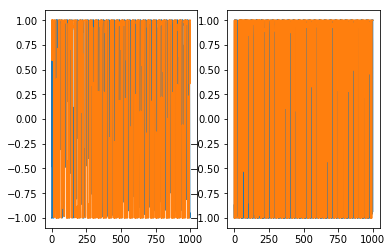

Score (max over agents) from episode 1: 2.70, Length of Episode is 1001 steps


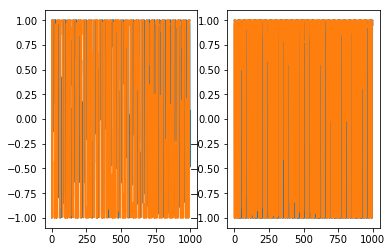

Score (max over agents) from episode 1: 2.60, Length of Episode is 1001 steps


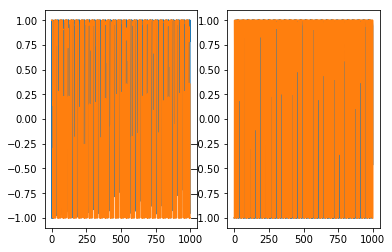

Score (max over agents) from episode 1: 2.60, Length of Episode is 1001 steps


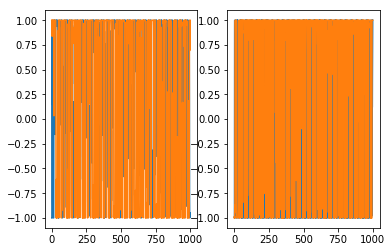

Score (max over agents) from episode 1: 2.70, Length of Episode is 1001 steps


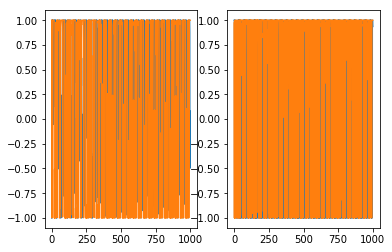

Score (max over agents) from episode 1: 2.70, Length of Episode is 1001 steps


In [16]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    lenEpisode = 0
    actions = [0 for i in range(num_agents)]               # list containing actions for all agents
    actions_epi = [[] for i in range(num_agents)]         # list containing actions for all agents
    while True:
        for i in range(num_agents):
            actions[i] = agents[i].act(states[i], beta=0.0)
            actions_epi[i].append(actions[i])
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        lenEpisode += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    ut.plot_actions_episode(actions_epi)
    print('Score (max over agents) from episode {}: {:.2f}, Length of Episode is {} steps'.format(i, np.max(scores), lenEpisode))

When finished, you can close the environment.

In [17]:
#env.close()